In [1]:
import pandas as pd
from io import StringIO
import matplotlib.pyplot as plt
import numpy as np
from numpy import NaN
import matplotlib
from scipy.ndimage.filters import gaussian_filter1d
from pylab import rcParams

#%matplotlib widget, camera ready submission problem
matplotlib.rc('pdf', fonttype=42)
matplotlib.rcParams['savefig.dpi'] = 300
rcParams.update({'figure.autolayout': True})

# Signal Strength

## Backscatter Tag

In [2]:
df_backscatter = pd.DataFrame(columns=["-47 dBm", "-37 dBm", "-27 dBm", "-17 dBm", "-7 dBm", "3 dBm", "13 dBm", "17 dBm"], index=["Round_1", "Round_2"])

In [3]:
df_backscatter.iloc[0,:] = [round(i, 2) for i in [-105.89, -96.295, -85.225, -75.06, -66.07, -55.0, -48.01, -44.995]]

df_backscatter.iloc[1,:] = [round(i, 2) for i in [-104.24, -98.225, -87.485, -76.165, -66.995, -59.015, -52.985, -49.605]]

## Reflection Amplifier

In [4]:
df_RF = pd.DataFrame(columns=["-37 dBm", "-27 dBm", "-17 dBm", "-7 dBm", "3 dBm", "13 dBm", "17 dBm"], index=["Round_1", "Round_2"])

In [5]:
df_RF.iloc[0,:] = [round(i, 2) for i in [-70.115, -62.2, -60.5, -60.185, -60.025, -61.12, -61.99]]

df_RF.iloc[1,:] = [round(i, 2) for i in [-68.49, -61.335, -59.2, -59.465, -58.59, -60.015, -60.63]]

## TDO

In [6]:
df_TDO = pd.DataFrame(columns=["-47 dBm", "-37 dBm", "-27 dBm", "-17 dBm", "-7 dBm", "3 dBm"], index=["Round_1", "Round_2"])

In [7]:
df_TDO.iloc[0,:] = [round(i, 2) for i in [-62.31, -62.11, -62.025, -62.93, -66.0, -80.065]]

df_TDO.iloc[1,:] = [round(i, 2) for i in [-73.73, -58.115, -57.975, -58.81, -65.32, -83.35]]

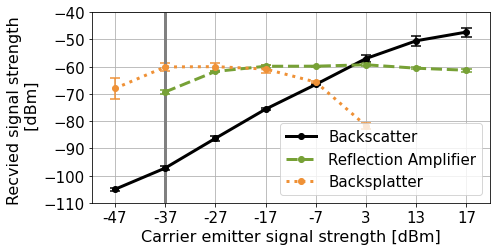

In [11]:
from pylab import rcParams
rcParams['figure.figsize'] = 7, 3.6
fig, ax1 = plt.subplots(1)

carrier = [-47, -37, -27, -17, -7, 3, 13, 23]
ax1.plot(carrier, df_backscatter.mean(), color='black', marker='o', markersize=6, linewidth=3, label='Backscatter')
ax1.plot(carrier[1:], df_RF.mean(), color='#77A136', marker='o', markersize=6, linewidth=3, linestyle='--', label='Reflection Amplifier')
ax1.plot(carrier[:-2], df_TDO.mean(), color='#EF9136', marker='o', markersize=6, linewidth=3, linestyle=':', label='Backsplatter')

# error bar
width=1
mean = df_backscatter.mean()
std = df_backscatter.std()
for i in range(8):
    d=carrier[i]
    m=mean[i]; s=std[i]/2
    ax1.vlines(d, (m-s), (m+s))
    ax1.hlines((m-s), d-width, d+width)
    ax1.hlines((m+s), d-width, d+width)
    
mean = df_TDO.mean()
std = df_TDO.std()
x = carrier[:-2]
for i in range(6):
    d=x[i]
    m=mean[i]; s=std[i]/2
    ax1.vlines(d, (m-s), (m+s), color='#EF9136')
    ax1.hlines((m-s), d-width, d+width, color='#EF9136')
    ax1.hlines((m+s), d-width, d+width, color='#EF9136')
    
mean = df_RF.mean()
std = df_RF.std()
x = carrier[1:]
for i in range(7):
    d=x[i]
    m=mean[i]; s=std[i]/2
    ax1.vlines(d, (m-s), (m+s), color='#77A136')
    ax1.hlines((m-s), d-width, d+width, color='#77A136')
    ax1.hlines((m+s), d-width, d+width, color='#77A136')

ax1.set_xlabel('Carrier emitter signal strength [dBm]', fontsize=16)
ax1.set_ylabel("Recvied signal strength \n [dBm]", fontsize=16)
ax1.tick_params(labelsize=15)

# Highlight a region where injection locking happends
ax1.vlines(-37, -110, -40, color='grey', linewidth=3)

# Set axis
tmp = [-110, -100, -90, -80, -70, -60, -50, -40]
ax1.set_yticks(tmp)
ax1.set_xticks(carrier)
ax1.set_xticklabels([-47, -37, -27, -17, -7, 3, 13, 17])
ax1.set_ylim([-110,-40])
ax1.grid()

# Set legend
plt.legend(fontsize=15, loc='lower right')
plt.tight_layout()
plt.savefig('./Signalstrength_tdo_backscatter_rf.pdf')

# Spectrum Plot

In [9]:
from matplotlib.ticker import FormatStrFormatter
def readfile(filename):
    types = {'frequency': float,'power': float}
    df = pd.read_csv(filename, skiprows=0, header=None, error_bad_lines=False, delim_whitespace=False, delimiter=' ')
    df.columns = ['frequency', 'power']
    df.dropna(inplace=True)
    #print(df.describe())
    return df

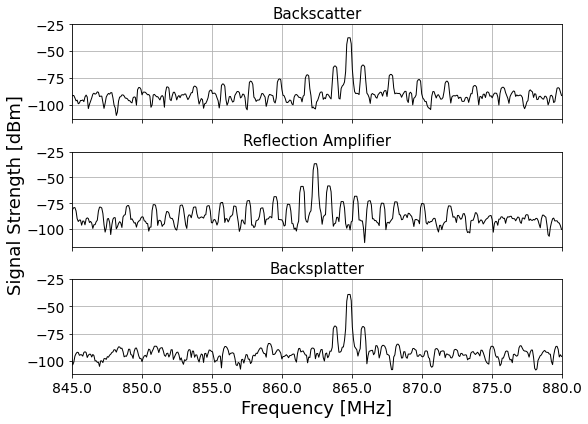

In [10]:
# Read data
path = './Spectrum/BackscatterTag_Tx60/'
filename = 'data0'
df_1 = readfile(path + filename + ".csv")

path = './Spectrum/RF_Tx60/'
filename = 'data0'
df_2 = readfile(path + filename + ".csv")

path = './Spectrum/TDO_Tx60_Basebandhigh/'
filename = 'data0'
df_3 = readfile(path + filename + ".csv")


# Visualization
from pylab import rcParams
rcParams.update({'figure.autolayout': True})
rcParams['figure.figsize'] = 8, 6
fig, (ax1,ax2,ax3) = plt.subplots(3,1)

ax1.plot(df_1['frequency']/1e6, df_1['power'], color='black', linewidth=1)
ax1.set_title('Backscatter', fontsize=15)
ax1.tick_params(labelbottom=False, labelsize=14)
ax1.set_yticks([-100, -75, -50, -25])
ax1.set_xlim([845, 880])
ax1.grid()

ax2.plot(df_2['frequency']/1e6, df_2['power'], color='black', linewidth=1)
ax2.set_title('Reflection Amplifier', fontsize=15)
ax2.tick_params(labelbottom=False, labelsize=14)
ax2.set_yticks([-100, -75, -50, -25])
ax2.set_xlim([845, 880])
ax2.grid()

ax3.plot(df_3['frequency']/1e6, df_3['power'], color='black', linewidth=1)
ax3.tick_params(labelsize=14)
ax3.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax3.set_title('Backsplatter', fontsize=15)
ax3.set_xlabel('Frequency [MHz]', fontsize=18)
ax3.set_yticks([-100, -75, -50, -25])
ax3.set_xlim([845, 880])
ax3.grid()


fig.text(0.0, 0.54, 'Signal Strength [dBm]', va='center', ha='center', rotation='vertical', fontsize=18)
plt.tight_layout()
plt.savefig('./Harmonics_tdo_backscatter_rf.pdf', bbox_inches = "tight")